Nguyễn Ngọc Sáng (ngocsangvn@gmail.com, [VnCFD](https://vncfdgroup.wordpress.com/)), Zhukovsky 12/2018

*Thực hành CFD với Python!*

# Thực hành CFD với Python !

Chào mừng các bạn đến với khóa học `"Thực hành CFD với Python!"`.
Khóa học dành cho những ai quan tâm tới CFD (Computational Fluid Dynamics) - `Tính toán động lực học lưu chất`. Nó cũng bổ ích cho các bạn đang nghiên cứu `giải tích số (phương pháp tính)` hay bạn nào muốn tìm một project thú vị để học `Python`. 

Khóa học được xây dựng dựa trên nhiều nguồn tham khảo khác nhau. Phần lý thuyết chủ yếu nằm trong quyển sách `Computational Fluid Mechanics and Heat Transfer - J. Tannehill, D. Anderson, R. Pletcher` và quyển `Computational Techniques for Fluid Dynamics - C. Fletcher`. Ngoài ra còn có các bài viết trên trang [VnCFD](https://vncfdgroup.wordpress.com/). Phần code dựa trên khóa học [CFD Python: 12 steps to Navier-Stokes](http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes) đã được giới thiệu trong bài [VnCFD](https://vncfdgroup.wordpress.com/2013/04/12/computational-fluid-dynamics-lorena-a-barba-boston-university). 

Khóa học sẽ được chia nhiều phần với các chủ đề khác nhau khác nhau. `"Phần I - Phương pháp sai phân hữu hạn"` gồm 10 bài. Qua 10 bước chúng ta sẽ tiếp cận với hệ phương trình Navier-Stokes cho chất lỏng không nén được. Hệ phương trình này có dạng:

\begin{array}{c}
\nabla \cdot\vec{v} = 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} = -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v} 
\end{array}

Ta thấy ở đây bóng dáng của các `phương trình đạo hàm riêng` như: phương trình dịch chuyển, phương trình truyền nhiệt, phương trình Laplace, phương trình Burgers. Các bài thực hành cũng được sắp xếp theo thứ tự đó.

Để thực hành hiệu quả, các bạn hãy ghi chép lại công thức, khai triển sơ đồ sai phân, tự viết code, hạn chế copy-paste. Trước khi bắt đầu bạn hãy cài Python hay IPython và tìm hiểu qua cách sử dụng (tham khảo: [VnCFD](https://vncfdgroup.wordpress.com/category/ngon-ngu-lap-trinh/)).

Mọi đóng góp cho khóa học xin gửi về địa chỉ [ngocsangvn@gmail.com].

Chúng ta hãy bắt đầu với việc tìm hiểu phương pháp sai phân hữu hạn (tham khảo: [VnCFD](https://vncfdgroup.wordpress.com/2013/04/10/cac-phuong-phap-cfd/))

# Bài 1. Phương pháp sai phân hữu hạn

Giả sử chúng ta phải tìm nghiệm phương trình đạo hàm riêng (PTĐHR):

$$\frac {\partial u}{\partial x} + \frac {\partial u}{\partial y} = 0\ trên\ miền\ 0 \leq x \leq 1, 0 \leq y \leq 1$$.

Sử dụng phương pháp tính không cho kết quả `nghiệm chính xác` u(x,y) liên tục (u tại mọi điểm) trên toàn bộ vùng tính toán mà chỉ cho `nghiệm gần đúng` tại các điểm rời rạc. Do đó trước hết chúng ta cần `rời rạc hóa` miền tính toán. Giả sử, chia đoạn $0 \leq x \leq 1$ thành (nx-1) đoạn bằng nhau có độ dài $\Delta x$, chia đoạn $0 \leq y \leq 1$ thành (ny-1) đoạn bằng nhau có độ dài $\Delta y$, ta thu được `lưới rời rạc` có $(nx-1)(ny-1)$ `ô lưới` và $(nx)(ny)$ `điểm lưới`. Khi đó nghiệm chính xác u(x, y) sẽ được thay thế bằng nghiệm gần đúng $u(i\Delta x, j\Delta y)$ tại các điểm lưới (i, j), với i là chỉ số theo trục x, j là chỉ số theo trục y. 
Để viết gọn, ta quy ước: $u(i\Delta x, j\Delta) y = u_{i, j}$. Với $i\Delta x = x_0, j\Delta y = y_0$ ta có:

\begin{array}{c}
u(x_0, y_0) = u_{i, j}\\
u(x_0 + \Delta x, y_0) = u_{i+1, j}\\
u(x_0 - \Delta x, y_0) = u_{i-1, j}\\
u(x_0, y_0 + \Delta y) = u_{i, j+1}\\
u(x_0, y_0 - \Delta y) = u_{i, j-1}\\
\end{array}

Truờng hợp y là thời gian ta dùng chỉ số 'n' và viết thành $u_i^n$.
Tiếp theo, chúng ta sử dụng lưới rời rạc như thế nào?

Trước khi trả lời câu hỏi này ta sẽ thực hành một bài tập nhỏ: sử dụng python để chia lưới, vẽ lưới. Ở đây ta sử dụng hai thư viện: `numpy` để tính toán mảng, ma trận; `pyplot` - vẽ đồ thị. Để chia lưới đơn giản, ta sử dụng hàm `linspace` trong numpy.

In [4]:
#Dùng '#' để bắt đầu một chú thích trong code

import numpy # Gọi thư viện numpy
from matplotlib import pyplot # Gọi thư viện pyplot từ matplotlib

#chỉ cần khi bạn sử dụng ipython notebook
%matplotlib inline 

#số điểm lưới theo trục x và y
nx = 11
ny = 11

#kích thước ô lưới 
dx = 1./(nx-1) #tại sao lại là (nx-1)?
dy = 1./(ny-1) # _____//______ (ny-1)?

#dùng hàm linspace để chia lưới đều: chia đoạn 0, 1 bởi nx, ny điểm
x = numpy.linspace(0, 1, nx) # Mảng (tập hợp) x gồm nx phần tử (điểm lưới) x[i] - i chạy từ 0 tới nx-1
y = numpy.linspace(0, 1, ny) # Mảng y gồm ny phần tử (điểm lưới) y[j] - j chạy từ 0 tới ny-1
x, y # Hiển thị mảng x,y

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [6]:
#lấy các phần tử của mảng:
print x[0], x[nx-1], x[-1] # phần tử đầu - thứ 0 - x[0], phần tử cuối x[nx-1] = x[-1]
print x[9:], x[:2], x[1:4] # các phần tử từ thứ 9 trở đi, trước thứ 2 , từ 1 đến trước 4

0.0 1.0 1.0
[ 0.9  1. ] [ 0.   0.1] [ 0.1  0.2  0.3]


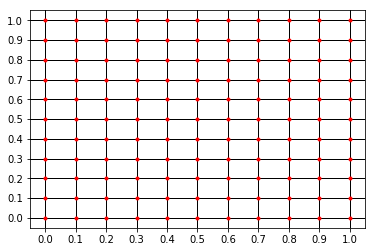

In [153]:
# Vẽ lưới
X, Y = numpy.meshgrid(x, y) # Tạo lưới X, Y
pyplot.grid(color='k', linestyle='-', linewidth=1) # color = 'r', 'g', 'b'...
pyplot.xticks(x) #giá trị trục x
pyplot.yticks(y) #giá trị trục y

pyplot.plot(X, Y, marker='.', color='r', linestyle='none')
# Hãy thử thay câu lệnh trên bằng câu lệnh sau:
#pyplot.plot(x, y, marker='.', color='r', linestyle='none')

pyplot.show()

**Quay lại với lưới rời rạc**. Theo định nghĩa đạo hàm riêng:
$$\frac{\partial u}{\partial x}(x_0, y_0) = \lim_{\Delta x \to 0} \frac {u(x_0 + \Delta x, y_0) - u(x_0, y_0)}{\Delta x}$$
Như vậy nếu như $\Delta x$ đủ nhỏ thì ta có xấp xỉ: 
$$\frac{\partial u}{\partial x}(x_0, y_0) \approx \frac{u(x_0+\Delta x, y_0)-u(x_0, y_0)}{\Delta x}$$
Độ chính xác của phép xấp xỉ sai phân này có thể xem xét thông qua khai triển Taylor. Ta có:
$$u(x_0 + \Delta x, y_0) = u(x_0, y_0) + \Delta x \frac {\partial u}{\partial x}(x_0, y_0) + \frac {(\Delta x)^2}{2!} \frac {\partial^2 u}{\partial x^2}(x_0, y_0) + \frac {(\Delta x)^3}{3!} \frac {\partial^3 u}{\partial x^3}(x_0, y_0) + ... \  (1) $$ 
Biến đổi phương trình trên ta thu được `sơ đồ sai phân`:
$$\frac{\partial u}{\partial x}(x_0, y_0) = \frac{u(x_0+\Delta x, y_0)-u(x_0, y_0)}{\Delta x} + O(\Delta x)$$
Hay ta có:
$$\frac{\partial u}{\partial x} = \frac{u_{i+1, j}-u_{i, j}}{\Delta x} + O(\Delta x)$$
Sơ đồ này còn được gọi là `sơ đồ sai phân phải` (vì 'bước sang phải i->i+1').

Ở đây, $O(\Delta x)$ gọi là `sai số phép xấp xỉ`, nó có giá trị tuyệt đối không vượt quá $k|\Delta x|, khi\ \Delta x \to 0, k>0$.

Trong trường hợp này ta nói phép xấp xỉ có độ chính xác bậc một, tương ứng `sơ đồ bậc 1`. Nếu phép xấp xỉ có sai số dạng $O(\Delta x^2)$, ta nói phép xấp xỉ có độ chính xác bậc hai, tương ứng `sơ đồ bậc 2`. Như vậy nếu $\Delta x$ đủ nhỏ thì sơ đồ bậc 2 chính xác hơn sơ đồ bậc 1. Tuy nhiên giá trị $\Delta x$ chừng nào là "đủ nhỏ", "nhỏ vừa đủ" thì còn phải xem xét.

Ngoài sơ đồ sai phân phải, chứng ta có thể xây dựng vô số các sơ đồ khác nhau cho đạo hàm riêng $\partial u / \partial x$ với bậc khác nhau. Ví dụ:
* `sơ đồ sai phân trái` bậc 1:
Khai triển Taylor:
$$ u(x_0 - \Delta x, y_0) = u(x_0, y_0) - \Delta x \frac {\partial u}{\partial x}(x_0, y_0) + \frac {(\Delta x)^2}{2!} \frac {\partial^2 u}{\partial x^2}(x_0, y_0) - \frac {(\Delta x)^3}{3!} \frac {\partial^3 u}{\partial x^3}(x_0, y_0) + ... \  (2) $$
ta có: 
$$\frac{\partial u}{\partial x} = \frac{u_{i, j}-u_{i-1, j}}{\Delta x} + O(\Delta x)$$
* `sơ đồ sai phân trung tâm` bậc 2:
Trừ hai vế phương trình (1) và (2) ta có:
$$\frac{\partial u}{\partial x} = \frac{u_{i+1, j}-u_{i-1, j}}{2\Delta x}  + O(\Delta x)^2$$

## Đạo hàm bậc hai:

Cộng hai vế phương trình (1) và (2) ta có một dạng sơ đồ sai phân cho đạo hàm bậc hai:

$$\frac{\partial^2 u}{\partial x^2} = \frac{u_{i+1, j}-2u_{i, j}+u_{i-1, j}}{(\Delta x)^2} + O(\Delta x)^2$$


Vậy, sử dụng sơ đồ sai phân như thế nào để giải PTĐHR? Câu hỏi này sẽ được làm rõ ở [bài 2].

Trước khi kết thức bài 1 về sơ đồ sai phân, chúng ta hãy thả lỏng một chút :)

In [156]:
# Giả sử nghiệm phương trình chúng ta đang xét là u = x-y
# Bạn có thể cho hàm u tùy ý 

u = X - Y # Giá trị hàm u được xác định trên lưới X, Y
u #hiển thị mảng u 

array([[ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8],
       [-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7],
       [-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6],
       [-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4],
       [-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3],
       [-0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2],
       [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]])

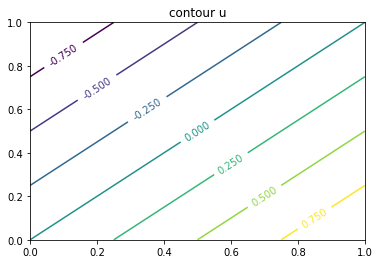

In [157]:
# vẽ đồ thị
fig, ax = pyplot.subplots()

# vẽ đường bình độ (đường đồng mức)
cs = ax.contour(X, Y, u)
ax.clabel(cs, inline=1, fontsize=10)

# Hãy comment hai câu lệnh trên và thử hai câu lệnh sau
#cs = ax.contourf(X, Y, u)
#fig.colorbar(cs, ax=ax)

ax.set_title('contour u')
pyplot.show()

### [Bài 2. Phương trình chuyển dịch tuyến tính một chiều](Bai_2.ipynb)